<a href="https://colab.research.google.com/github/ufukuyan/TEB_Casestudy/blob/main/TEB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TEB Case Study

1.   Import Libraries












In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

2.   Load Dataset



In [3]:
df = pd.read_csv("CaseStudy_AnomalyDetection_202012.csv", delimiter=';')
df.head()

,Target,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,Var_10,Var_11,Var_12,Var_13,Var_14,Var_15,Var_16,Var_17,Var_18,Var_19,Var_20,Var_21,Var_22,Var_23,Var_24,Var_25,Var_26,Var_27,Var_28,Var_29,Var_30,Var_31,Var_32,Var_33,Var_34,Var_35,Var_36,Var_37,Var_38,Var_39,Var_40
0,0,N,X,3.0,1331.0,0.0,1.0,Y,Y,Y,1,4000.0,NaN,NaN,NaN,1,0,0,9050.0,0.0000,0.000000,N,N,0,0.0,NaN,0.3613,1.0,0.0,0.0,0,NaN,0,14.0,L,Y,0.0,0.0,0.0,0,NaN
1,0,N,X,4.0,1174.0,6002.0,1.0,Y,Y,Y,1,5900.0,NaN,NaN,NaN,1,0,0,16710.0,2.8716,1.012825,N,N,0,0.0,NaN,0.4775,5.0,0.0,0.0,0,0,0,8.0,O,Y,0.0,0.0,0.0,0,NaN
2,0,N,X,2.0,980.0,2455.0,0.0,Y,Y,Y,1,2000.0,NaN,NaN,NaN,1,0,0,3600.0,0.0000,0.689801,N,N,0,0.0,NaN,0.0000,5.0,0.0,0.0,0,NaN,0,22.0,L,Y,0.0,0.0,0.0,0,NaN
3,0,N,X,6.0,1070.0,632.0,0.0,Y,N,Y,1,2971.0,NaN,NaN,NaN,1,0,0,2750.0,0.0000,3.160000,N,N,0,0.0,NaN,0.2521,1.0,0.0,0.0,0,NaN,0,0.0,L,N,0.0,0.0,0.0,0,NaN
4,0,N,X,0.0,1257.0,200.0,0.0,Y,Y,Y,1,3500.0,NaN,NaN,NaN,1,0,0,1300.0,0.0000,0.200200,N,N,0,0.0,NaN,0.0000,5.0,0.0,0.0,0,1,0,22.0,I,Y,0.0,0.0,0.0,0,NaN


3.   Examine dataset





In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Target  75000 non-null  int64  
 1   Var_1   74520 non-null  object 
 2   Var_2   73040 non-null  object 
 3   Var_3   74537 non-null  float64
 4   Var_4   74497 non-null  float64
 5   Var_5   74497 non-null  float64
 6   Var_6   74537 non-null  float64
 7   Var_7   74520 non-null  object 
 8   Var_8   75000 non-null  object 
 9   Var_9   75000 non-null  object 
 10  Var_10  75000 non-null  int64  
 11  Var_11  74504 non-null  float64
 12  Var_12  2083 non-null   float64
 13  Var_13  2083 non-null   float64
 14  Var_14  2403 non-null   float64
 15  Var_15  75000 non-null  int64  
 16  Var_16  75000 non-null  int64  
 17  Var_17  75000 non-null  int64  
 18  Var_18  74497 non-null  float64
 19  Var_19  74537 non-null  float64
 20  Var_20  74537 non-null  float64
 21  Var_21  48956 non-null  object 
 22

In [5]:
df.describe()

,Target,Var_3,Var_4,Var_5,Var_6,Var_10,Var_11,Var_12,Var_13,Var_14,Var_15,Var_16,Var_17,Var_18,Var_19,Var_20,Var_23,Var_24,Var_25,Var_26,Var_27,Var_28,Var_29,Var_30,Var_32,Var_33,Var_36,Var_37,Var_38,Var_39
count,75000.000000,74537.000000,74497.000000,74497.000000,74537.000000,75000.000000,7.450400e+04,2083.000000,2083.000000,2403.000000,75000.000000,75000.000000,75000.000000,74497.000000,74537.000000,74537.000000,75000.000000,74520.000000,9615.000000,74537.000000,69430.000000,59023.000000,74520.000000,75000.000000,75000.0,73634.000000,74515.000000,74520.000000,74515.000000,75000.000000
mean,0.010000,3.074876,1233.861605,1475.148194,0.849940,0.712227,2.160155e+04,1.765723,0.146423,0.711194,0.789067,0.000573,0.000280,11119.156731,30.053382,1.363676,0.013253,0.000483,0.059282,0.129016,1.903140,0.129051,0.000510,0.058507,0.0,12.958212,20.064645,0.002026,4.631313,0.051293
std,0.099499,3.711363,341.665804,4486.814036,1.249142,0.452728,4.727668e+06,3.829813,0.639081,1.793871,0.407974,0.023938,0.016731,22437.986065,208.698740,64.393863,0.114358,0.121385,0.311724,5.398335,1.470198,0.538259,0.038066,0.234701,0.0,10.562667,959.688466,0.467932,308.884529,0.220597
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1094.000000,7.000000,0.000000,0.000000,1.621000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,1268.000000,500.000000,0.000000,1.000000,2.500000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5000.000000,0.000000,0.201803,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,12.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,4.000000,1432.000000,1450.000000,1.000000,1.000000,4.180000e+03,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11880.000000,0.000000,0.414663,0.000000,0.000000,0.000000,0.131700,2.000000,0.000000,0.000000,0.000000,0.0,20.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,112.000000,1900.000000,404590.000000,39.000000,1.000000,1.290439e+09,34.000000,15.000000,26.000000,1.000000,1.000000,1.000000,854550.000000,14969.000000,15994.000000,1.000000,33.000000,7.000000,1151.000000,5.000000,7.000000,6.000000,1.000000,0.0,42.000000,146810.000000,127.000000,63750.000000,1.000000


4. Drop duplicated rows

In [6]:
df.duplicated().sum()

356

In [7]:
df.drop_duplicates(inplace=True, keep='last')



> 5.Check Missing Data



In [8]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Var_40,Var_12,Var_13,Var_14,Var_25,Var_31,Var_21,Var_28,Var_27,Var_34,Var_2,Var_33,Var_18,Var_5,Var_4,Var_22,Var_11,Var_38,Var_36,Var_24,Var_29,Var_7,Var_1,Var_37,Var_3,Var_6,Var_20,Var_19,Var_26,Var_15,Var_16,Var_17,Var_10,Var_9,Var_8,Var_39,Var_23,Var_30,Var_32,Var_35,Target
Total,74637.000000,72561.000000,72561.000000,72241.000000,65049.000000,35760.0000,25689.000000,15624.000000,5217.000000,3898.000000,1610.000000,1352.000000,177.000000,177.000000,177.000000,170.000000,170.000000,160.000000,159.000000,154.000000,154.000000,154.000000,154.000000,154.000000,138.000000,138.000000,138.000000,138.000000,138.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,99.990622,97.209421,97.209421,96.780719,87.145651,47.9074,34.415358,20.931354,6.989175,5.222121,2.156905,1.811264,0.237126,0.237126,0.237126,0.227748,0.227748,0.214351,0.213011,0.206313,0.206313,0.206313,0.206313,0.206313,0.184878,0.184878,0.184878,0.184878,0.184878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


More than 80% of Var_40, Var_12, Var_13, Var_14, and Var_25 are missing. I decided to drop these columns.

In [9]:
cols_with_missing = [col for col in df.columns 
                                 if (df[col].isnull().sum()/df[col].isnull().count()) > 0.8]
df.drop(cols_with_missing, axis=1, inplace=True)


To handle remaining columns with missing data, I fill missing values of numeric columns with median of them and missing values of categorical columns with the most frequent values.

In [10]:
cols_with_missing = [col for col in df.columns 
                                 if (df[col].isnull().sum()/df[col].isnull().count()) > 0 ] 

for col in cols_with_missing:
    if df[col].dtype in ['float64', 'int64']:
        df[col].fillna(df[col].median(), inplace = True)
    else:
        df[col].fillna(df[col].mode()[0], inplace = True)

In [11]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Var_39,Var_38,Var_18,Var_17,Var_16,Var_15,Var_11,Var_10,Var_9,Var_8,Var_7,Var_6,Var_5,Var_4,Var_3,Var_2,Var_1,Var_19,Var_20,Var_21,Var_31,Var_37,Var_36,Var_35,Var_34,Var_33,Var_32,Var_30,Var_22,Var_29,Var_28,Var_27,Var_26,Var_24,Var_23,Target
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


6. Convert non-numeric columns to categorical columns

In [12]:
categorical_cols = [col for col in df.columns 
                                 if df[col].dtype == 'object'] 

for col in categorical_cols:
    df[col] = df[col].astype('category')

df[categorical_cols].head()

,Var_1,Var_2,Var_7,Var_8,Var_9,Var_21,Var_22,Var_31,Var_34,Var_35
0,N,X,Y,Y,Y,N,N,0,L,Y
1,N,X,Y,Y,Y,N,N,0,O,Y
2,N,X,Y,Y,Y,N,N,0,L,Y
3,N,X,Y,N,Y,N,N,0,L,N
4,N,X,Y,Y,Y,N,N,1,I,Y


In [13]:
numeric_cols = [col for col in df.columns 
                                 if df[col].dtype in ['float64', 'int64']] 
                               

##Exploratory Data Analysis
I analyse both categorical and numeric variables with countplot and box plot respectively to get intuition about provided data. I will also utilize Sweetviz which is an open source Python library that generates beautiful, high-density visualizations.

In [1]:
!pip install sweetviz

     |████████████████████████████████| 15.1 MB 181 kB/s 


In [14]:
import sweetviz
report = sweetviz.analyze([df,'df'],target_feat='Target')
report.show_html('report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


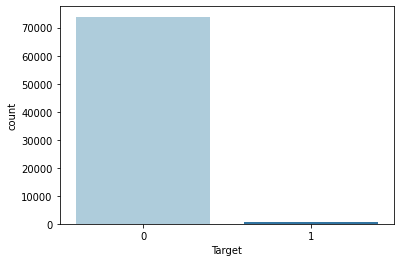

In [ ]:
sns.countplot(x='Target',data=df,palette='Paired');

The target data is totally imbalanced. I will handle this problem in the next section.

8. Explore Categoric variables

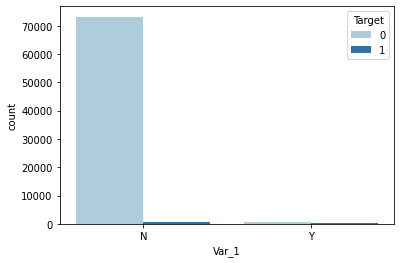

In [ ]:
sns.countplot(x=categorical_cols[0],data=df, hue='Target', palette='Paired');


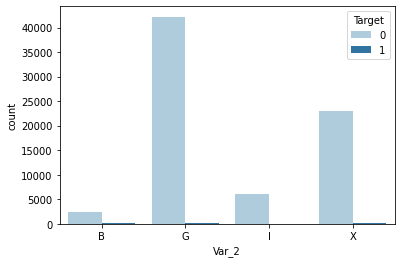

In [ ]:
sns.countplot(x=categorical_cols[1],data=df, hue='Target',palette='Paired');

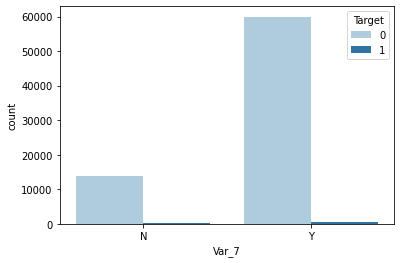

In [ ]:
sns.countplot(x=categorical_cols[2],data=df, hue='Target',palette='Paired');

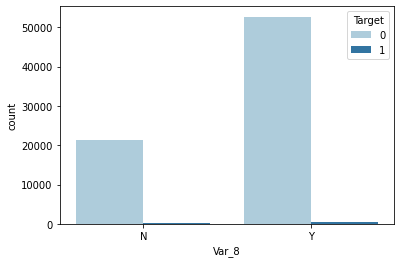

In [ ]:
sns.countplot(x=categorical_cols[3],data=df, hue='Target',palette='Paired');

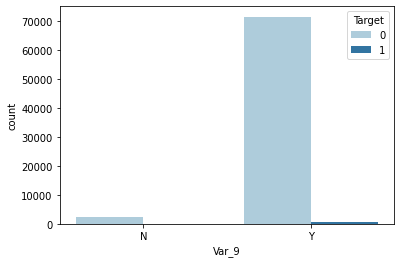

In [ ]:
sns.countplot(x=categorical_cols[4],data=df, hue='Target',palette='Paired');

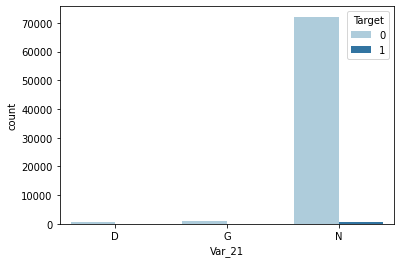

In [ ]:
sns.countplot(x=categorical_cols[5],data=df, hue='Target',palette='Paired');

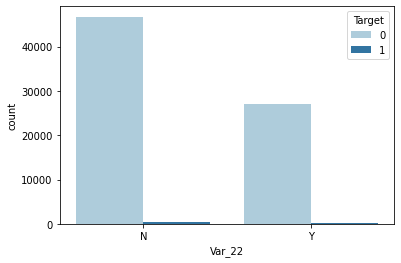

In [ ]:
sns.countplot(x=categorical_cols[6],data=df, hue='Target',palette='Paired');

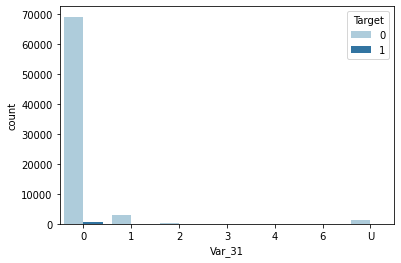

In [ ]:
sns.countplot(x=categorical_cols[7],data=df, hue='Target',palette='Paired');

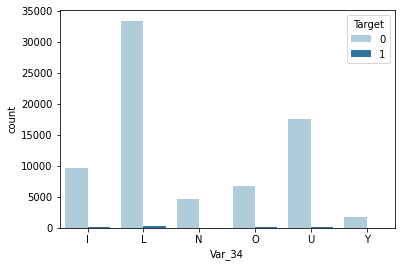

In [ ]:
sns.countplot(x=categorical_cols[8],data=df, hue='Target',palette='Paired');

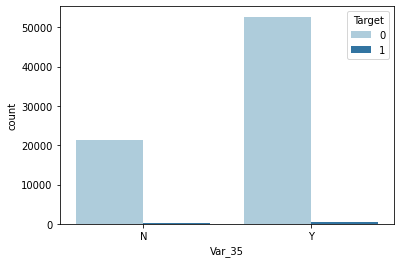

In [ ]:
sns.countplot(x=categorical_cols[9],data=df, hue='Target',palette='Paired');

Var_1, Var_9, Var_21, and Var_31 are unbalanced.


9. Analyze Numeric Columns

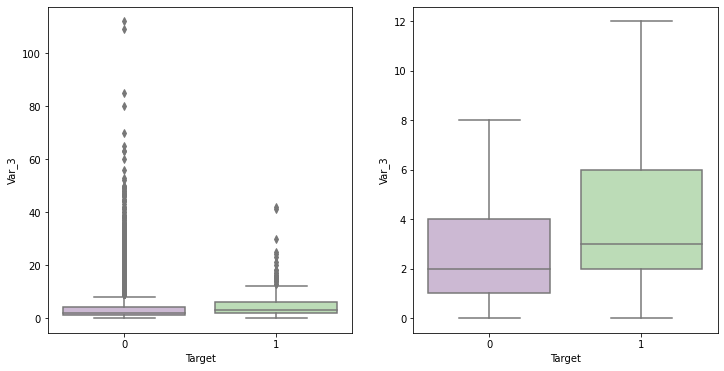

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Target", y="Var_3",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Target", y="Var_3",data=df, palette="PRGn",showfliers=False)
plt.show();

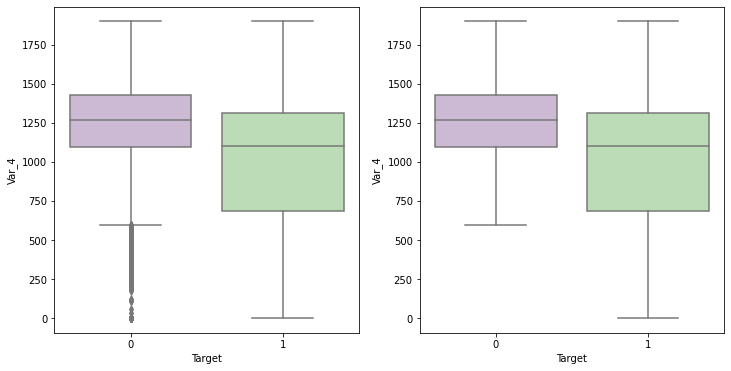

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Target", y="Var_4",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Target", y="Var_4",data=df, palette="PRGn",showfliers=False)
plt.show();

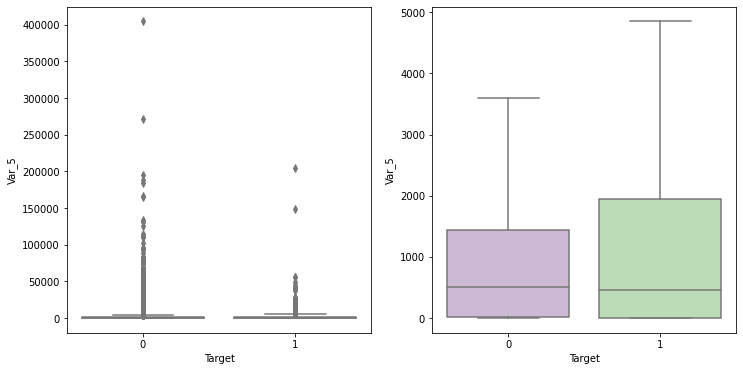

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Target", y="Var_5",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Target", y="Var_5",data=df, palette="PRGn",showfliers=False)
plt.show();

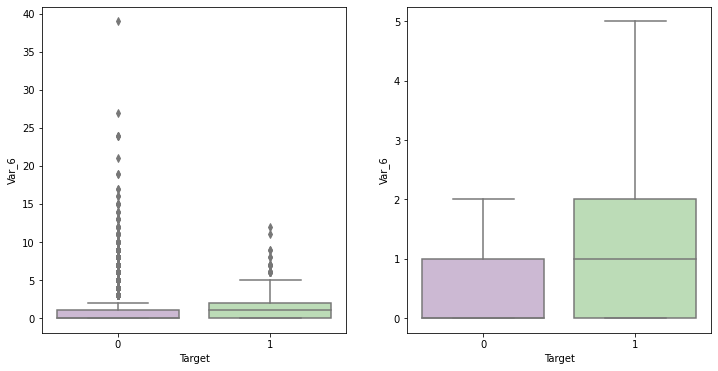

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Target", y="Var_6",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Target", y="Var_6",data=df, palette="PRGn",showfliers=False)
plt.show();

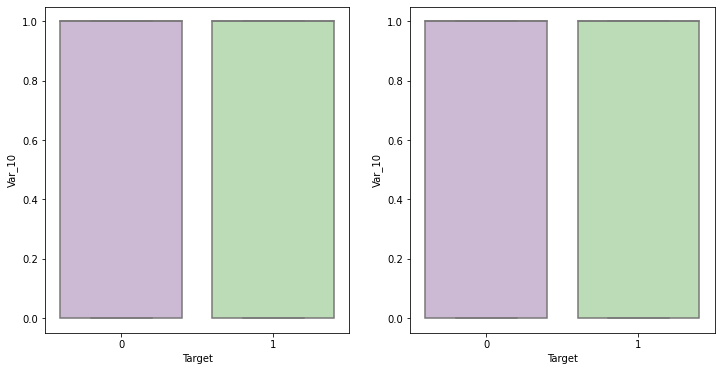

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Target", y="Var_10",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Target", y="Var_10",data=df, palette="PRGn",showfliers=False)
plt.show();

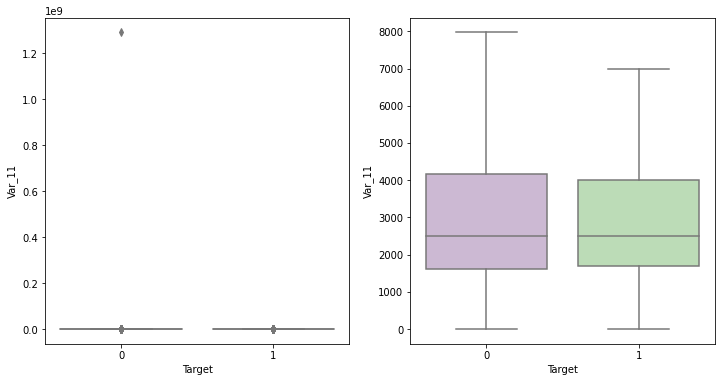

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Target", y="Var_11",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Target", y="Var_11",data=df, palette="PRGn",showfliers=False)
plt.show();

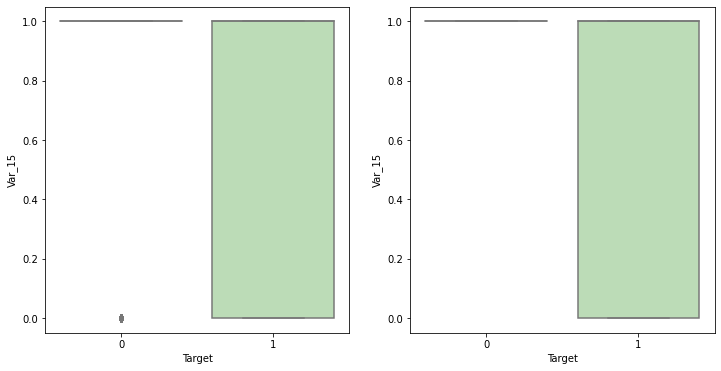

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Target", y="Var_15",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Target", y="Var_15",data=df, palette="PRGn",showfliers=False)
plt.show();

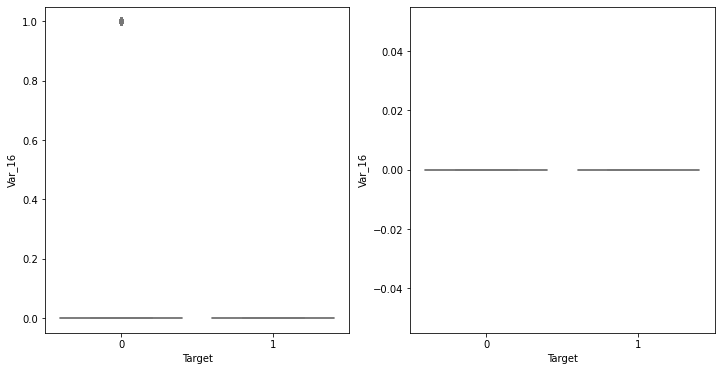

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Target", y="Var_16",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Target", y="Var_16",data=df, palette="PRGn",showfliers=False)
plt.show();

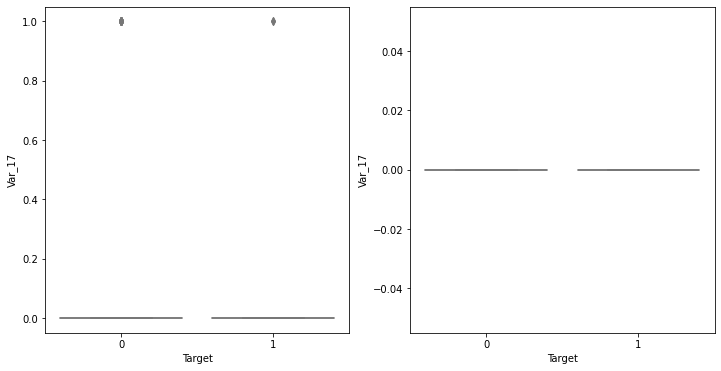

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Target", y="Var_17",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Target", y="Var_17",data=df, palette="PRGn",showfliers=False)
plt.show();

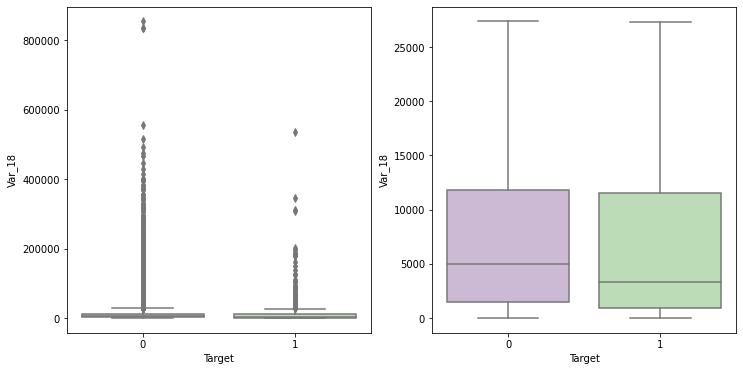

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Target", y="Var_18",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Target", y="Var_18",data=df, palette="PRGn",showfliers=False)
plt.show();

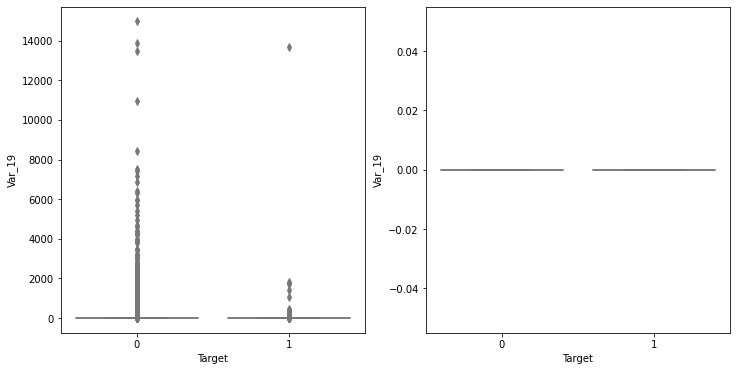

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Target", y="Var_19",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Target", y="Var_19",data=df, palette="PRGn",showfliers=False)
plt.show();

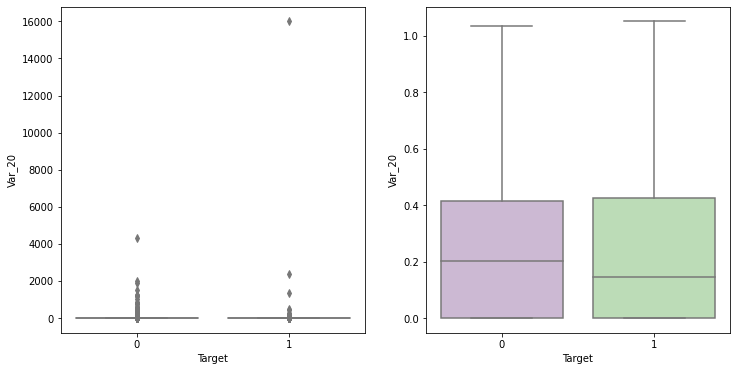

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Target", y="Var_20",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Target", y="Var_20",data=df, palette="PRGn",showfliers=False)
plt.show();

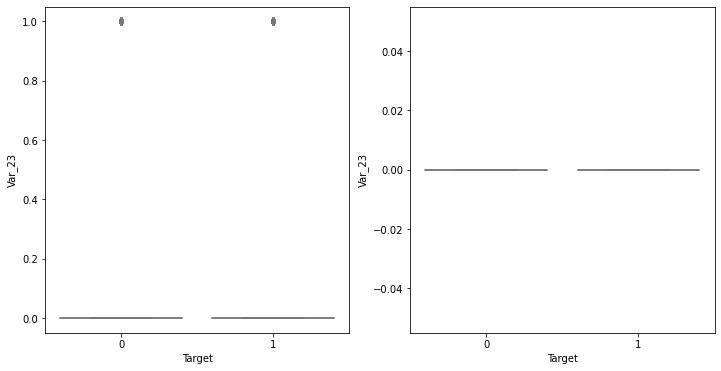

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Target", y="Var_23",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Target", y="Var_23",data=df, palette="PRGn",showfliers=False)
plt.show();

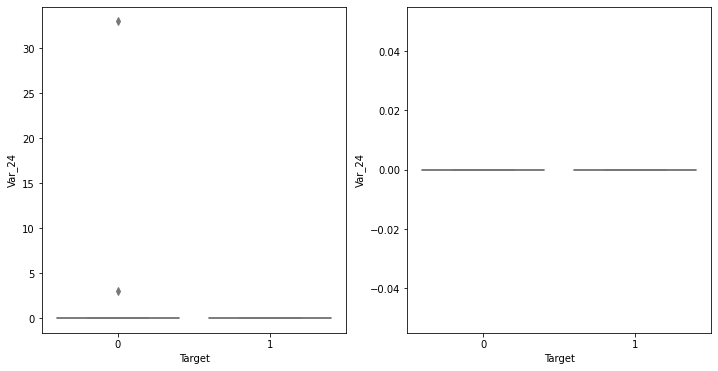

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Target", y="Var_24",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Target", y="Var_24",data=df, palette="PRGn",showfliers=False)
plt.show();

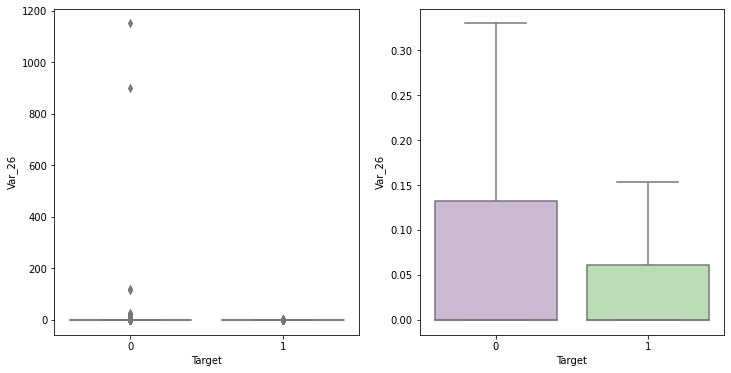

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Target", y="Var_26",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Target", y="Var_26",data=df, palette="PRGn",showfliers=False)
plt.show();

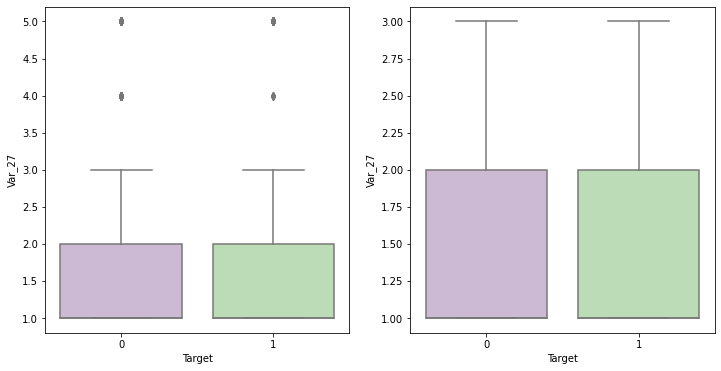

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Target", y="Var_27",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Target", y="Var_27",data=df, palette="PRGn",showfliers=False)
plt.show();

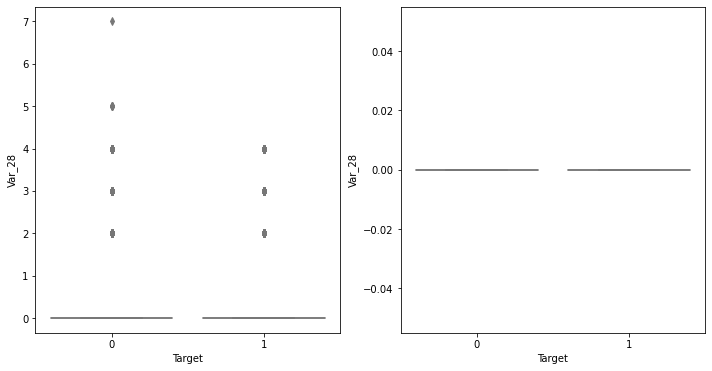

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Target", y="Var_28",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Target", y="Var_28",data=df, palette="PRGn",showfliers=False)
plt.show();

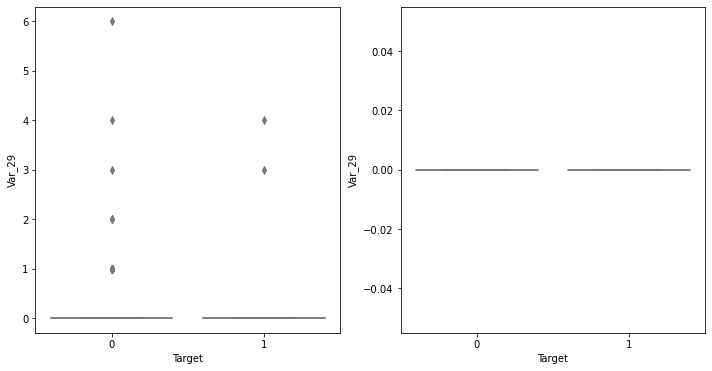

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Target", y="Var_29",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Target", y="Var_29",data=df, palette="PRGn",showfliers=False)
plt.show();

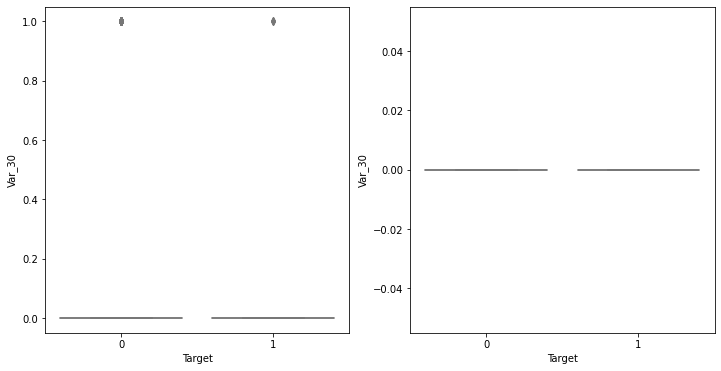

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Target", y="Var_30",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Target", y="Var_30",data=df, palette="PRGn",showfliers=False)
plt.show();

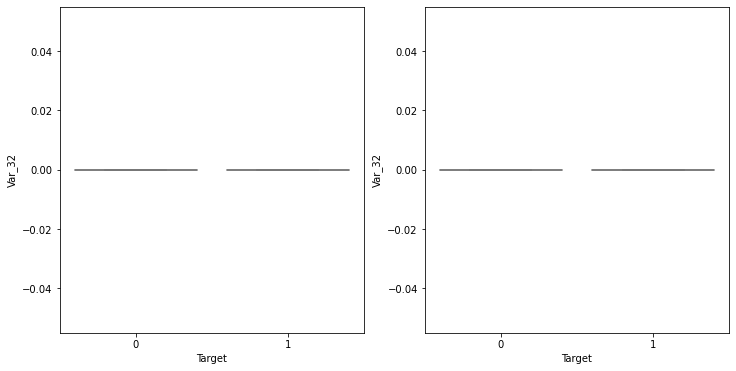

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Target", y="Var_32",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Target", y="Var_32",data=df, palette="PRGn",showfliers=False)
plt.show();

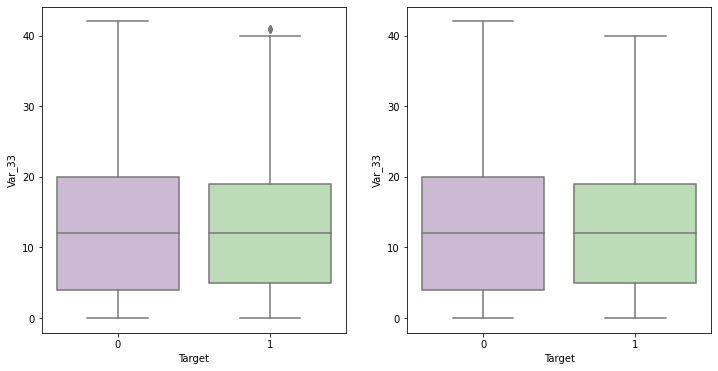

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Target", y="Var_33",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Target", y="Var_33",data=df, palette="PRGn",showfliers=False)
plt.show();

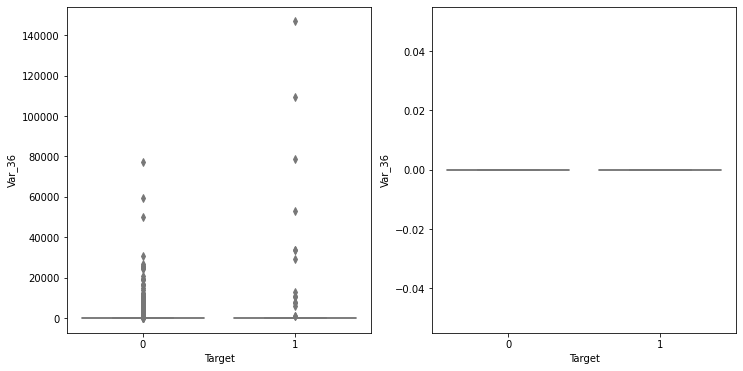

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Target", y="Var_36",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Target", y="Var_36",data=df, palette="PRGn",showfliers=False)
plt.show();

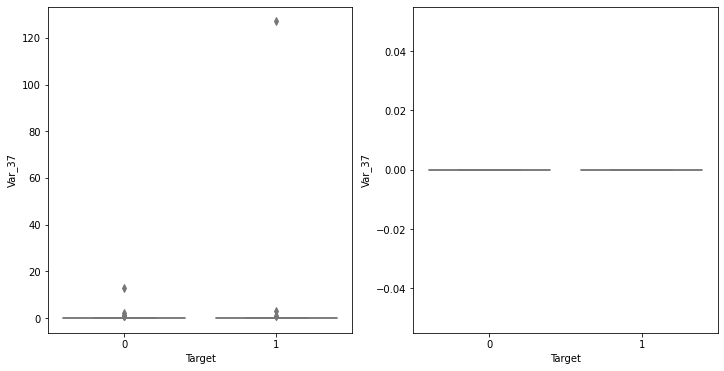

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Target", y="Var_37",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Target", y="Var_37",data=df, palette="PRGn",showfliers=False)
plt.show();

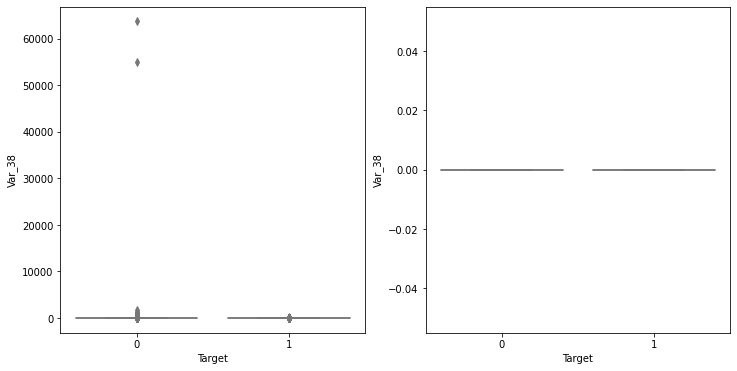

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Target", y="Var_38",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Target", y="Var_38",data=df, palette="PRGn",showfliers=False)
plt.show();

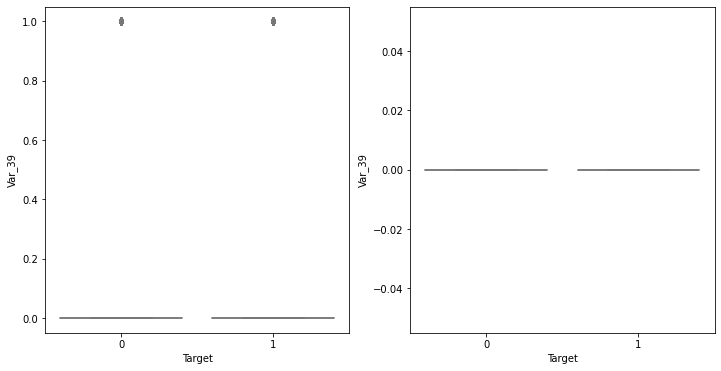

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Target", y="Var_39",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Target", y="Var_39",data=df, palette="PRGn",showfliers=False)
plt.show();

It seems that Var_32 just contains 0. Therefore, I dropped it out.

In [ ]:
dropped_cols = ['Var_32']
df.drop(dropped_cols, axis=1, inplace=True)

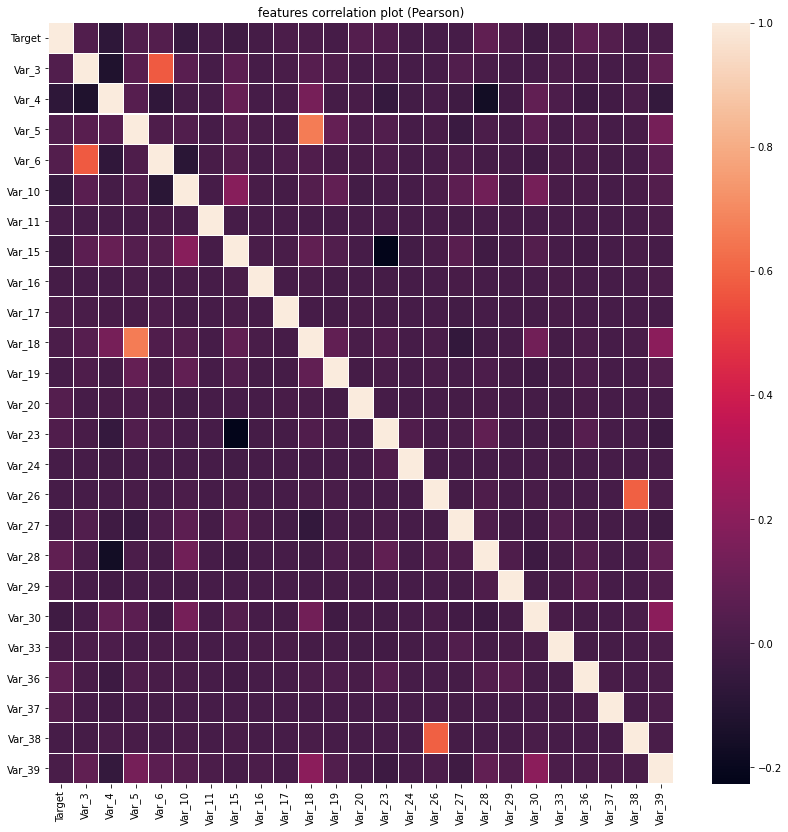

In [ ]:
plt.figure(figsize = (14,14))
plt.title('features correlation plot (Pearson)')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74644 entries, 0 to 74999
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Target  74644 non-null  int64   
 1   Var_1   74644 non-null  category
 2   Var_2   74644 non-null  category
 3   Var_3   74644 non-null  float64 
 4   Var_4   74644 non-null  float64 
 5   Var_5   74644 non-null  float64 
 6   Var_6   74644 non-null  float64 
 7   Var_7   74644 non-null  category
 8   Var_8   74644 non-null  category
 9   Var_9   74644 non-null  category
 10  Var_10  74644 non-null  int64   
 11  Var_11  74644 non-null  float64 
 12  Var_15  74644 non-null  int64   
 13  Var_16  74644 non-null  int64   
 14  Var_17  74644 non-null  int64   
 15  Var_18  74644 non-null  float64 
 16  Var_19  74644 non-null  float64 
 17  Var_20  74644 non-null  float64 
 18  Var_21  74644 non-null  category
 19  Var_22  74644 non-null  category
 20  Var_23  74644 non-null  int64   
 21  Var_24  7464

#Handling Imbalanced Data

In case of imbalance class problems, the model is trained mainly on the majority class and the model becomes biased towards the majority class prediction. In our case, only 1%of total data correspond to Class 1.

There are various class balancing techniques that solve the problem of class imbalance by either generating a new sampling of the minority class or removing some majority class samples. Class balancing techniques can be classified into two categories:
- Over-sampling techniques: Oversampling techniques refer to create artificial minority class points. 
- Under-sampling techniques: Undersampling techniques refer to remove majority class points.

A disadvantage of using undersampling techniques is that we are losing out a lot of majority class data points. Oversampling techniques remedy this disadvantage but creating multiple samples within the minority class may result in overfitting of the model.

In [ ]:
neg, pos = np.bincount(df['Target'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 74644
    Positive: 745 (1.00% of total)



In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df.head()

,Target,Var_3,Var_4,Var_5,Var_6,Var_10,Var_11,Var_15,Var_16,Var_17,Var_18,Var_19,Var_20,Var_23,Var_24,Var_26,Var_27,Var_28,Var_29,Var_30,Var_33,Var_36,Var_37,Var_38,Var_39,Var_1_Y,Var_2_G,Var_2_I,Var_2_X,Var_7_Y,Var_8_Y,Var_9_Y,Var_21_G,Var_21_N,Var_22_Y,Var_31_1,Var_31_2,Var_31_3,Var_31_4,Var_31_6,Var_31_U,Var_34_L,Var_34_N,Var_34_O,Var_34_U,Var_34_Y,Var_35_Y
0,0,3.0,1331.0,0.0,1.0,1,4000.0,1,0,0,9050.0,0.0000,0.000000,0,0.0,0.3613,1.0,0.0,0.0,0,14.0,0.0,0.0,0.0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0,4.0,1174.0,6002.0,1.0,1,5900.0,1,0,0,16710.0,2.8716,1.012825,0,0.0,0.4775,5.0,0.0,0.0,0,8.0,0.0,0.0,0.0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,2.0,980.0,2455.0,0.0,1,2000.0,1,0,0,3600.0,0.0000,0.689801,0,0.0,0.0000,5.0,0.0,0.0,0,22.0,0.0,0.0,0.0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,6.0,1070.0,632.0,0.0,1,2971.0,1,0,0,2750.0,0.0000,3.160000,0,0.0,0.2521,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0.0,1257.0,200.0,0.0,1,3500.0,1,0,0,1300.0,0.0000,0.200200,0,0.0,0.0000,5.0,0.0,0.0,0,22.0,0.0,0.0,0.0,0,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
cols_to_scale = [col for col in df.columns 
                                 if df[col].dtype == 'float64'] 

scaler = StandardScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [ ]:
X = df.drop('Target',axis='columns')
y = df.Target.astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=15, stratify=y_train)

In [ ]:
import tensorflow as tf
from tensorflow import keras
import tempfile
import os

In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR')
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[-1],)),
      keras.layers.BatchNormalization(),
      keras.layers.Dropout(0.3),
      keras.layers.Dense(256, activation='relu'),
      keras.layers.BatchNormalization(),
      keras.layers.Dropout(0.3),
      keras.layers.Dense(256, activation='relu'),
      keras.layers.BatchNormalization(),
      keras.layers.Dropout(0.3),
      keras.layers.Dense(1, activation='sigmoid',bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [ ]:
EPOCHS = 200
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc', 
    verbose=1,
    patience=20,
    mode='max',
    restore_best_weights=True)

In [ ]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               12032     
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               6

In [ ]:
model.predict(X_train[:10])

array([[0.20648056],
       [0.17073554],
       [0.19982019],
       [0.20884761],
       [0.19088826],
       [0.22103462],
       [0.20754811],
       [0.24114132],
       [0.21796367],
       [0.2207095 ]], dtype=float32)

Set the correct initial bias.

In [ ]:
results = model.evaluate(X_train, y_train, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.2533


In [ ]:
initial_bias = np.log([pos/neg])
initial_bias

array([-4.59707036])

In [ ]:
model = make_model(output_bias=initial_bias)
model.predict(X_train[:10])

array([[0.00868654],
       [0.01086462],
       [0.00933114],
       [0.00891951],
       [0.00927499],
       [0.00760058],
       [0.00881046],
       [0.00935414],
       [0.00864339],
       [0.00893158]], dtype=float32)

In [ ]:
results = model.evaluate(X_train, y_train, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.0571


This initial loss is less than if would have been with naive initialization.

To make the various training comparable, keep this initial model's weights in a checkpoint file, and load them into each model before training.

In [ ]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

Train the model with raw data.

In [ ]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_val, y_val))

Epoch 1/200
24/24 [==============================] - 6s 132ms/step - loss: 0.0741 - tp: 22.0000 - fp: 101.0000 - tn: 141784.0000 - fn: 1409.0000 - accuracy: 0.9895 - precision: 0.1789 - recall: 0.0154 - auc: 0.5261 - prc: 0.0194 - val_loss: 0.0561 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 11824.0000 - val_fn: 119.0000 - val_accuracy: 0.9900 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5092 - val_prc: 0.0143
Epoch 2/200
24/24 [==============================] - 2s 87ms/step - loss: 0.0624 - tp: 15.0000 - fp: 68.0000 - tn: 47227.0000 - fn: 462.0000 - accuracy: 0.9889 - precision: 0.1807 - recall: 0.0314 - auc: 0.6491 - prc: 0.0324 - val_loss: 0.0556 - val_tp: 0.0000e+00 - val_fp: 1.0000 - val_tn: 11823.0000 - val_fn: 119.0000 - val_accuracy: 0.9900 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5881 - val_prc: 0.0195
Epoch 3/200
24/24 [==============================] - 2s 90ms/step - loss: 0.0584 - tp: 11.0000 - fp: 47.0000 - tn: 47248.000

In [ ]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

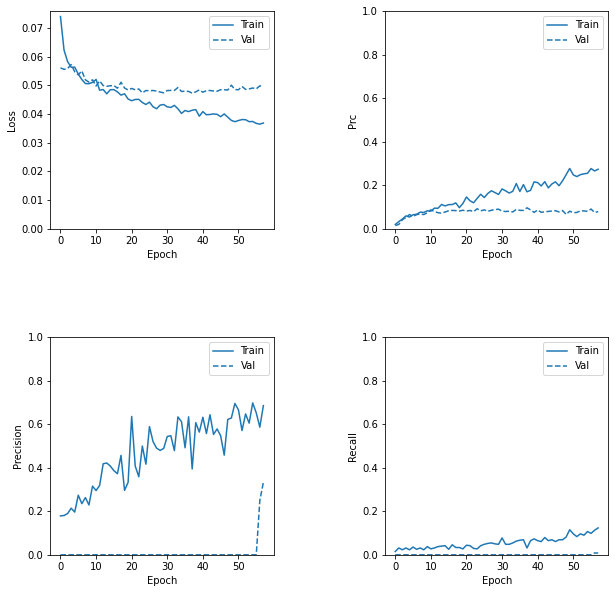

In [ ]:
plt.figure(figsize=(10,10))
plot_metrics(baseline_history)
plt.subplots_adjust(wspace=0.5, hspace=0.5)

In [ ]:
train_predictions_baseline = model.predict(X_train, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(X_test, batch_size=BATCH_SIZE)

In [ ]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

loss :  0.04822034016251564
tp :  2.0
fp :  1.0
tn :  14779.0
fn :  147.0
accuracy :  0.9900864362716675
precision :  0.6666666865348816
recall :  0.01342281885445118
auc :  0.787747323513031
prc :  0.08525314927101135

Total Fraudulent Transactions:  149
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     14780
         1.0       0.67      0.01      0.03       149

    accuracy                           0.99     14929
   macro avg       0.83      0.51      0.51     14929
weighted avg       0.99      0.99      0.99     14929



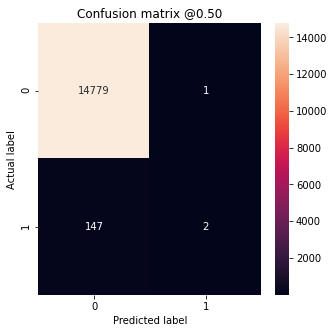

In [ ]:
baseline_results = model.evaluate(X_test, y_test,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(y_test, test_predictions_baseline)
print("Classification Report: \n", classification_report(y_test, np.round(test_predictions_baseline)))

Accuracy is high but recall and F1 scores are low. Data imbalance is the main reason for this problem.

##Undersampling Method

In [ ]:
# Class count
count_class_0, count_class_1 = df.Target.value_counts()

# Divide by class
df_class_0 = df[df['Target'] == 0]
df_class_1 = df[df['Target'] == 1]

df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Target.value_counts())

Random under-sampling:
1    745
0    745
Name: Target, dtype: int64


In [ ]:
X_under = df_test_under.drop('Target',axis='columns')
y_under = df_test_under.Target.astype(np.float32)

X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.2, random_state=15, stratify=y_under)
X_train_under, X_val_under, y_train_under, y_val_under = train_test_split(X_train_under, y_train_under, test_size=0.2, random_state=15, stratify=y_train_under)

In [ ]:
model_under = make_model()
model_under.load_weights(initial_weights)
baseline_history_under = model_under.fit(
    X_train_under,
    y_train_under,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_val_under, y_val_under))

Epoch 1/200
1/1 [==============================] - 4s 4s/step - loss: 2.3359 - tp: 9.0000 - fp: 1.0000 - tn: 15255.0000 - fn: 617.0000 - accuracy: 0.9611 - precision: 0.9000 - recall: 0.0144 - auc: 0.7586 - prc: 0.1375 - val_loss: 2.2954 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 120.0000 - val_fn: 119.0000 - val_accuracy: 0.5021 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6049 - val_prc: 0.6101
Epoch 2/200
1/1 [==============================] - 0s 70ms/step - loss: 2.1351 - tp: 11.0000 - fp: 2.0000 - tn: 474.0000 - fn: 466.0000 - accuracy: 0.5089 - precision: 0.8462 - recall: 0.0231 - auc: 0.6468 - prc: 0.6550 - val_loss: 2.2286 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 120.0000 - val_fn: 119.0000 - val_accuracy: 0.5021 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6473 - val_prc: 0.6533
Epoch 3/200
1/1 [==============================] - 0s 64ms/step - loss: 2.0316 - tp: 31.0000 - fp: 4.0000 - tn: 472.0000 - fn: 446.0000 - a

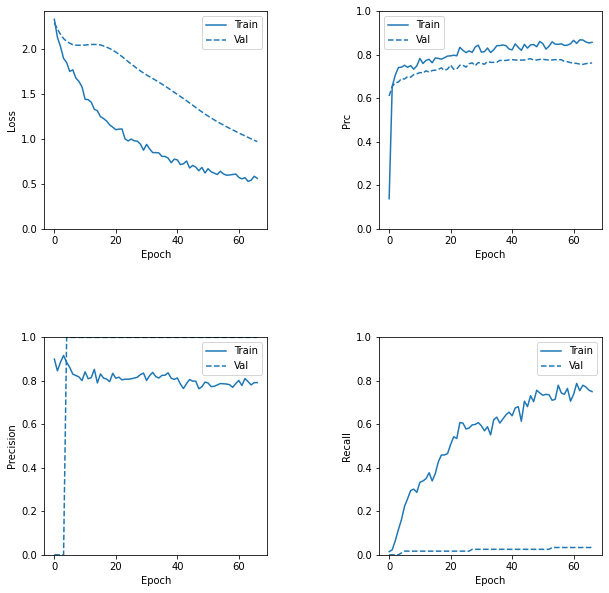

In [ ]:
plt.figure(figsize=(10,10))
plot_metrics(baseline_history_under)
plt.subplots_adjust(wspace=0.5, hspace=0.5)

loss :  1.294959306716919
tp :  2.0
fp :  0.0
tn :  149.0
fn :  147.0
accuracy :  0.5067114233970642
precision :  1.0
recall :  0.01342281885445118
auc :  0.7763389348983765
prc :  0.7496305704116821

Total Fraudulent Transactions:  149
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.50      1.00      0.67       149
         1.0       1.00      0.01      0.03       149

    accuracy                           0.51       298
   macro avg       0.75      0.51      0.35       298
weighted avg       0.75      0.51      0.35       298



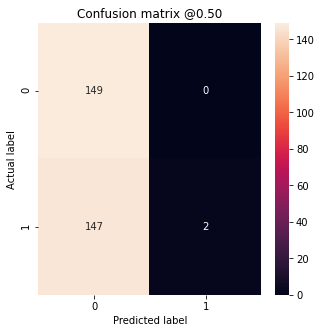

In [ ]:
train_predictions_baseline_under = model_under.predict(X_train_under, batch_size=BATCH_SIZE)
test_predictions_baseline_under = model_under.predict(X_test_under, batch_size=BATCH_SIZE)
baseline_results_under = model_under.evaluate(X_test_under, y_test_under,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model_under.metrics_names, baseline_results_under):
  print(name, ': ', value)
print()

plot_cm(y_test_under, test_predictions_baseline_under)
print("Classification Report: \n", classification_report(y_test_under, np.round(test_predictions_baseline_under)))

In [ ]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Target.value_counts())

Random over-sampling:
1    73899
0    73899
Name: Target, dtype: int64


In [ ]:
X_over = df_test_over.drop('Target',axis='columns')
y_over = df_test_over.Target.astype(np.float32)

X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size=0.2, random_state=15, stratify=y_over)
X_train_over, X_val_over, y_train_over, y_val_over = train_test_split(X_train_over, y_train_over, test_size=0.2, random_state=15, stratify=y_train_over)

In [ ]:
model_over = make_model()
model_over.load_weights(initial_weights)
baseline_history_over = model_over.fit(
    X_train_over,
    y_train_over,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_val_over, y_val_over))

Epoch 1/200
47/47 [==============================] - 8s 120ms/step - loss: 1.2489 - tp: 21080.0000 - fp: 5834.0000 - tn: 41610.0000 - fn: 26364.0000 - accuracy: 0.6607 - precision: 0.7832 - recall: 0.4443 - auc: 0.7652 - prc: 0.7552 - val_loss: 1.2886 - val_tp: 203.0000 - val_fp: 9.0000 - val_tn: 11815.0000 - val_fn: 11621.0000 - val_accuracy: 0.5082 - val_precision: 0.9575 - val_recall: 0.0172 - val_auc: 0.8318 - val_prc: 0.8161
Epoch 2/200
47/47 [==============================] - 4s 89ms/step - loss: 0.6649 - tp: 33474.0000 - fp: 11142.0000 - tn: 36153.0000 - fn: 13821.0000 - accuracy: 0.7361 - precision: 0.7503 - recall: 0.7078 - auc: 0.8230 - prc: 0.8068 - val_loss: 0.6837 - val_tp: 1062.0000 - val_fp: 51.0000 - val_tn: 11773.0000 - val_fn: 10762.0000 - val_accuracy: 0.5428 - val_precision: 0.9542 - val_recall: 0.0898 - val_auc: 0.8045 - val_prc: 0.8050
Epoch 3/200
47/47 [==============================] - 4s 87ms/step - loss: 0.5014 - tp: 36595.0000 - fp: 11953.0000 - tn: 35342.000

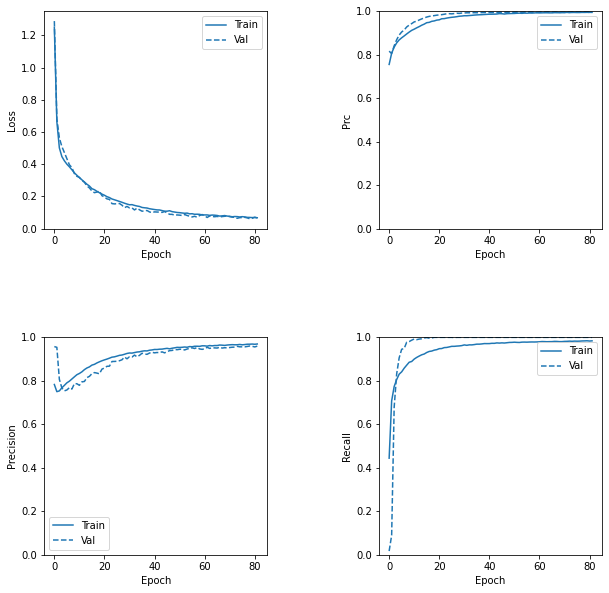

In [ ]:
plt.figure(figsize=(10,10))
plot_metrics(baseline_history_over)
plt.subplots_adjust(wspace=0.5, hspace=0.5)

loss :  0.07082130759954453
tp :  14780.0
fp :  717.0
tn :  14063.0
fn :  0.0
accuracy :  0.9757442474365234
precision :  0.953732967376709
recall :  1.0
auc :  0.9973573684692383
prc :  0.9950850605964661

Total Fraudulent Transactions:  14780
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.95      0.98     14780
         1.0       0.95      1.00      0.98     14780

    accuracy                           0.98     29560
   macro avg       0.98      0.98      0.98     29560
weighted avg       0.98      0.98      0.98     29560



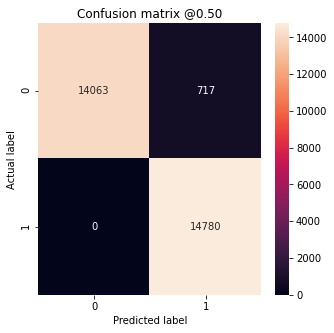

In [ ]:
train_predictions_baseline_over = model_over.predict(X_train_over, batch_size=BATCH_SIZE)
test_predictions_baseline_over = model_over.predict(X_test_over, batch_size=BATCH_SIZE)
baseline_results_over = model_over.evaluate(X_test_over, y_test_over,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model_over.metrics_names, baseline_results_over):
  print(name, ': ', value)
print()

plot_cm(y_test_over, test_predictions_baseline_over)
print("Classification Report: \n", classification_report(y_test_over, np.round(test_predictions_baseline_over)))

Despite having lower accuracy than raw training, this model has higher recall and F1 scores.

## Synthetic Minority Oversampling Technique(SMOTE) 
SMOTE is one of the popular and famous oversampling technique that creates synthetic minority class data points to balance the dataset.

SMOTE works using a k-nearest neighbor algorithm to create synthetic data points.

In [ ]:
from imblearn.over_sampling import SMOTE
X_smote = df.drop('Target',axis='columns')
y_smote = df['Target']

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X_smote, y_smote)

X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)
X_train_sm, X_val_sm, y_train_sm, y_val_sm = train_test_split(X_train_sm, y_train_sm, test_size=0.2, random_state=15, stratify=y_train_sm)

In [ ]:
model_sm = make_model()
model_sm.load_weights(initial_weights)
baseline_history_sm = model_sm.fit(
    X_train_sm,
    y_train_sm,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_val_sm, y_val_sm))

Epoch 1/200
47/47 [==============================] - 8s 108ms/step - loss: 1.1168 - tp: 38751.0000 - fp: 7283.0000 - tn: 54792.0000 - fn: 23324.0000 - accuracy: 0.7535 - precision: 0.8418 - recall: 0.6243 - auc: 0.8523 - prc: 0.8633 - val_loss: 1.1879 - val_tp: 381.0000 - val_fp: 37.0000 - val_tn: 11787.0000 - val_fn: 11443.0000 - val_accuracy: 0.5145 - val_precision: 0.9115 - val_recall: 0.0322 - val_auc: 0.8262 - val_prc: 0.7940
Epoch 2/200
47/47 [==============================] - 4s 88ms/step - loss: 0.5422 - tp: 37189.0000 - fp: 11789.0000 - tn: 35506.0000 - fn: 10106.0000 - accuracy: 0.7685 - precision: 0.7593 - recall: 0.7863 - auc: 0.8510 - prc: 0.8301 - val_loss: 0.6561 - val_tp: 1314.0000 - val_fp: 100.0000 - val_tn: 11724.0000 - val_fn: 10510.0000 - val_accuracy: 0.5513 - val_precision: 0.9293 - val_recall: 0.1111 - val_auc: 0.8633 - val_prc: 0.8395
Epoch 3/200
47/47 [==============================] - 4s 87ms/step - loss: 0.4437 - tp: 39582.0000 - fp: 11555.0000 - tn: 35740.0

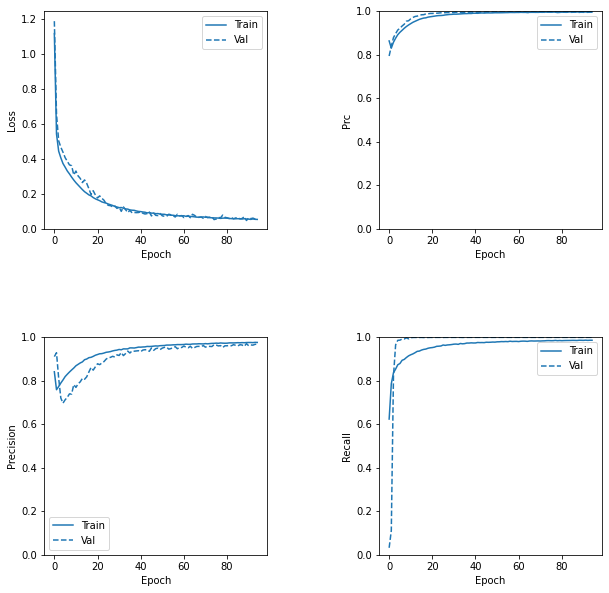

In [ ]:
plt.figure(figsize=(10,10))
plot_metrics(baseline_history_sm)
plt.subplots_adjust(wspace=0.5, hspace=0.5)

loss :  0.053968291729688644
tp :  14780.0
fp :  513.0
tn :  14267.0
fn :  0.0
accuracy :  0.9826454520225525
precision :  0.9664552211761475
recall :  1.0
auc :  0.9980342984199524
prc :  0.9963777661323547

Total Fraudulent Transactions:  14780
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     14780
           1       0.97      1.00      0.98     14780

    accuracy                           0.98     29560
   macro avg       0.98      0.98      0.98     29560
weighted avg       0.98      0.98      0.98     29560



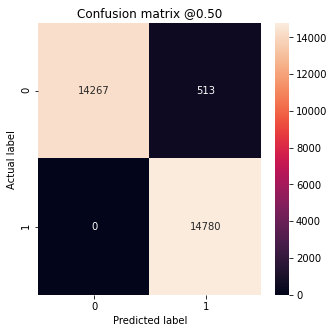

In [ ]:
train_predictions_baseline_sm = model_sm.predict(X_train_sm, batch_size=BATCH_SIZE)
test_predictions_baseline_sm = model_sm.predict(X_test_sm, batch_size=BATCH_SIZE)
baseline_results_sm = model_sm.evaluate(X_test_sm, y_test_sm,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model_sm.metrics_names, baseline_results_sm):
  print(name, ': ', value)
print()

plot_cm(y_test_sm, test_predictions_baseline_sm)
print("Classification Report: \n", classification_report(y_test_sm, np.round(test_predictions_baseline_sm)))

All metrics show that smote oversampling method results is better performance than classical oversampling method. To increase the effectiveness of handling the imbalanced class, I will try the combination of SMOTE with some undersampling techniques such as ENN and Tomek.

##Combination of SMOTE with Tomek Links Undersampling
First SMOTE is applied to create new synthetic minority samples to get a balanced distribution. Then, Tomek Links is used in removing the samples close to the boundary of the two classes, to increase the separation between the two classes.

In [ ]:
from imblearn.combine import SMOTETomek
X_smoteTomek = df.drop('Target',axis='columns')
y_smoteTomek = df['Target']

smt = SMOTETomek(random_state=42)
X_smTomek, y_smTomek = smt.fit_sample(X_smoteTomek, y_smoteTomek)

X_train_smTomek, X_test_smTomek, y_train_smTomek, y_test_smTomek = train_test_split(X_smTomek, y_smTomek, test_size=0.2, random_state=15, stratify=y_smTomek)
X_train_smTomek, X_val_smTomek, y_train_smTomek, y_val_smTomek = train_test_split(X_train_smTomek, y_train_smTomek, test_size=0.2, random_state=15, stratify=y_train_smTomek)


In [ ]:
model_smTomek = make_model()
model_smTomek.load_weights(initial_weights)
baseline_history_smTomek = model_smTomek.fit(
    X_train_smTomek,
    y_train_smTomek,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_val_smTomek, y_val_smTomek))

Epoch 1/200
47/47 [==============================] - 8s 106ms/step - loss: 1.1292 - tp: 38811.0000 - fp: 7175.0000 - tn: 54889.0000 - fn: 23254.0000 - accuracy: 0.7549 - precision: 0.8440 - recall: 0.6253 - auc: 0.8541 - prc: 0.8650 - val_loss: 1.1655 - val_tp: 345.0000 - val_fp: 37.0000 - val_tn: 11785.0000 - val_fn: 11476.0000 - val_accuracy: 0.5130 - val_precision: 0.9031 - val_recall: 0.0292 - val_auc: 0.8147 - val_prc: 0.7829
Epoch 2/200
47/47 [==============================] - 4s 85ms/step - loss: 0.5542 - tp: 36522.0000 - fp: 11525.0000 - tn: 35759.0000 - fn: 10763.0000 - accuracy: 0.7643 - precision: 0.7601 - recall: 0.7724 - auc: 0.8480 - prc: 0.8276 - val_loss: 0.6369 - val_tp: 1715.0000 - val_fp: 182.0000 - val_tn: 11640.0000 - val_fn: 10106.0000 - val_accuracy: 0.5649 - val_precision: 0.9041 - val_recall: 0.1451 - val_auc: 0.8431 - val_prc: 0.8172
Epoch 3/200
47/47 [==============================] - 4s 86ms/step - loss: 0.4456 - tp: 39765.0000 - fp: 11635.0000 - tn: 35649.0

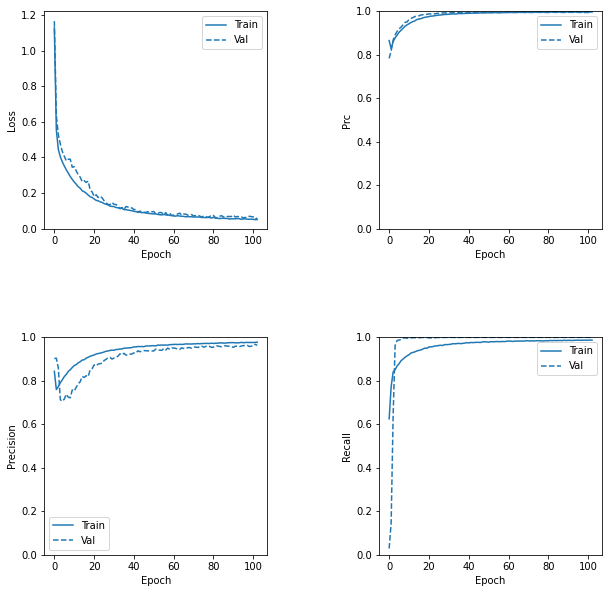

In [ ]:
plt.figure(figsize=(10,10))
plot_metrics(baseline_history_smTomek)
plt.subplots_adjust(wspace=0.5, hspace=0.5)

loss :  0.059033382683992386
tp :  14777.0
fp :  593.0
tn :  14184.0
fn :  0.0
accuracy :  0.9799350500106812
precision :  0.9614183306694031
recall :  1.0
auc :  0.9977956414222717
prc :  0.9957594871520996

Total Fraudulent Transactions:  14777
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     14777
           1       0.96      1.00      0.98     14777

    accuracy                           0.98     29554
   macro avg       0.98      0.98      0.98     29554
weighted avg       0.98      0.98      0.98     29554



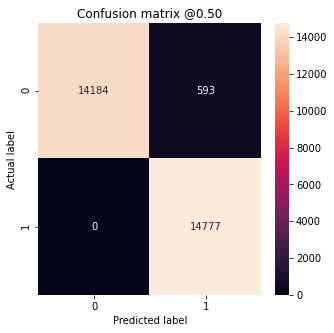

In [ ]:
train_predictions_baseline_smTomek = model_smTomek.predict(X_train_smTomek, batch_size=BATCH_SIZE)
test_predictions_baseline_smTomek = model_smTomek.predict(X_test_smTomek, batch_size=BATCH_SIZE)
baseline_results_smTomek = model_smTomek.evaluate(X_test_smTomek, y_test_smTomek,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model_smTomek.metrics_names, baseline_results_smTomek):
  print(name, ': ', value)
print()

plot_cm(y_test_smTomek, test_predictions_baseline_smTomek)
print("Classification Report: \n", classification_report(y_test_smTomek, np.round(test_predictions_baseline_smTomek)))

##Combination of SMOTE with ENN:
First SMOTE is applied to create synthetic data points of minority class samples, then using ENN the data points on the border or boundary are removed to increase the separation of the two classes.

In [ ]:
from imblearn.combine import SMOTEENN

X_smoteENN = df.drop('Target',axis='columns')
y_smoteENN = df['Target']

smtENN = SMOTEENN(random_state=42)
X_smENN, y_smENN = smtENN.fit_sample(X_smoteENN, y_smoteENN)

X_train_smENN, X_test_smENN, y_train_smENN, y_test_smENN = train_test_split(X_smENN, y_smENN, test_size=0.2, random_state=15, stratify=y_smENN)
X_train_smENN, X_val_smENN, y_train_smENN, y_val_smENN = train_test_split(X_train_smENN, y_train_smENN, test_size=0.2, random_state=15, stratify=y_train_smENN)

In [ ]:
model_smENN = make_model()
model_smENN.load_weights(initial_weights)
baseline_history_smENN = model_smENN.fit(
    X_train_smENN,
    y_train_smENN,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_val_smENN, y_val_smENN))

Epoch 1/200
45/45 [==============================] - 8s 109ms/step - loss: 1.1317 - tp: 39448.0000 - fp: 6488.0000 - tn: 52530.0000 - fn: 22525.0000 - accuracy: 0.7602 - precision: 0.8588 - recall: 0.6365 - auc: 0.8622 - prc: 0.8778 - val_loss: 1.2221 - val_tp: 390.0000 - val_fp: 23.0000 - val_tn: 11038.0000 - val_fn: 11409.0000 - val_accuracy: 0.4999 - val_precision: 0.9443 - val_recall: 0.0331 - val_auc: 0.8448 - val_prc: 0.8304
Epoch 2/200
45/45 [==============================] - 4s 86ms/step - loss: 0.5129 - tp: 38375.0000 - fp: 10528.0000 - tn: 33713.0000 - fn: 8821.0000 - accuracy: 0.7884 - precision: 0.7847 - recall: 0.8131 - auc: 0.8702 - prc: 0.8633 - val_loss: 0.6153 - val_tp: 2146.0000 - val_fp: 108.0000 - val_tn: 10953.0000 - val_fn: 9653.0000 - val_accuracy: 0.5730 - val_precision: 0.9521 - val_recall: 0.1819 - val_auc: 0.8800 - val_prc: 0.8710
Epoch 3/200
45/45 [==============================] - 4s 86ms/step - loss: 0.4136 - tp: 40401.0000 - fp: 10031.0000 - tn: 34210.000

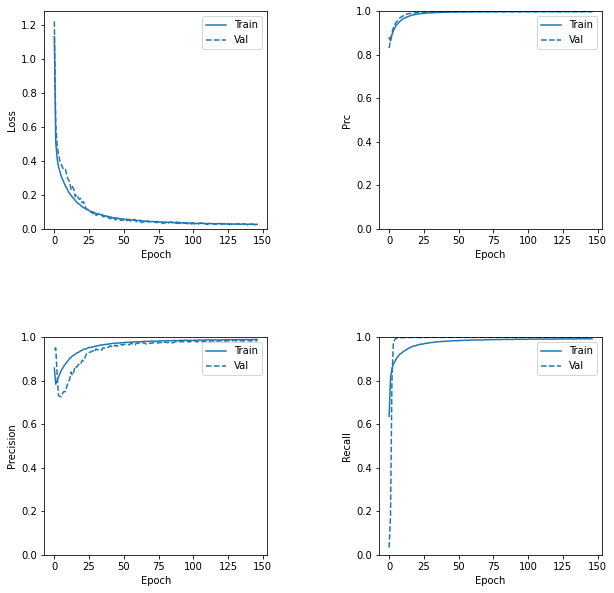

In [ ]:
plt.figure(figsize=(10,10))
plot_metrics(baseline_history_smENN)
plt.subplots_adjust(wspace=0.5, hspace=0.5)

loss :  0.024507712572813034
tp :  14749.0
fp :  226.0
tn :  13600.0
fn :  0.0
accuracy :  0.9920910000801086
precision :  0.9849081635475159
recall :  1.0
auc :  0.9990149140357971
prc :  0.998159646987915

Total Fraudulent Transactions:  14749
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     13826
           1       0.98      1.00      0.99     14749

    accuracy                           0.99     28575
   macro avg       0.99      0.99      0.99     28575
weighted avg       0.99      0.99      0.99     28575



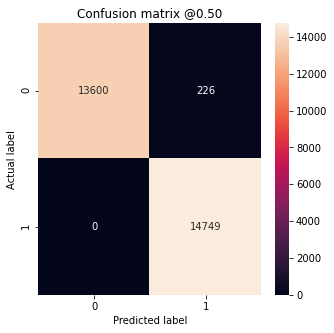

In [ ]:
train_predictions_baseline_smENN = model_smENN.predict(X_train_smENN, batch_size=BATCH_SIZE)
test_predictions_baseline_smENN = model_smENN.predict(X_test_smENN, batch_size=BATCH_SIZE)
baseline_results_smENN = model_smENN.evaluate(X_test_smENN, y_test_smENN,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model_smENN.metrics_names, baseline_results_smENN):
  print(name, ': ', value)
print()

plot_cm(y_test_smENN, test_predictions_baseline_smENN)
print("Classification Report: \n", classification_report(y_test_smENN, np.round(test_predictions_baseline_smENN)))

## XGBoost Classifier with Smote Data




Total Fraudulent Transactions:  14780
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96     14780
           1       0.96      0.96      0.96     14780

    accuracy                           0.96     29560
   macro avg       0.96      0.96      0.96     29560
weighted avg       0.96      0.96      0.96     29560



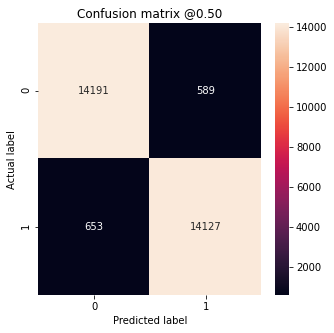

In [ ]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train_sm, y_train_sm, eval_metric='aucpr')

train_predictions_baseline_xgboost = xgb_clf.predict(X_train_sm)
test_predictions_baseline_xgboost = xgb_clf.predict(X_test_sm)

plot_cm(y_test_sm, test_predictions_baseline_xgboost)
print("Classification Report: \n", classification_report(y_test_sm, np.round(test_predictions_baseline_xgboost)))


## Random Forest Classifier with Smote Data

Total Fraudulent Transactions:  14780
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     14780
           1       1.00      0.99      1.00     14780

    accuracy                           1.00     29560
   macro avg       1.00      1.00      1.00     29560
weighted avg       1.00      1.00      1.00     29560



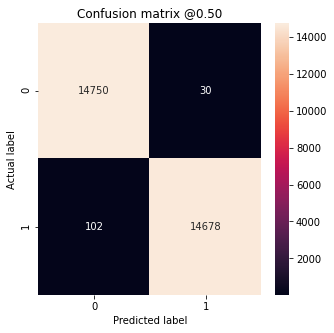

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, oob_score=False)
rf_model.fit(X_train_sm, y_train_sm)

train_predictions_baseline_rf = rf_model.predict(X_train_sm)
test_predictions_baseline_rf = rf_model.predict(X_test_sm)

plot_cm(y_test_sm, test_predictions_baseline_rf)
print("Classification Report: \n", classification_report(y_test_sm, np.round(test_predictions_baseline_rf)))

## LigthGBM Classifier with Smote Data

Total Fraudulent Transactions:  14780
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     14780
           1       1.00      0.99      0.99     14780

    accuracy                           0.99     29560
   macro avg       0.99      0.99      0.99     29560
weighted avg       0.99      0.99      0.99     29560



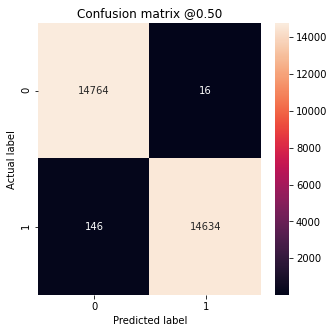

In [ ]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(objective='binary', boosting_type = 'goss', n_estimators = 200, class_weight = 'balanced')
lgbm_model.fit(X_train_sm, y_train_sm, early_stopping_rounds=100, eval_set = [(X_val_sm, y_val_sm)], 
          eval_metric = 'auc', verbose=False)

train_predictions_baseline_lgbm = lgbm_model.predict(X_train_sm)
test_predictions_baseline_lgbm = lgbm_model.predict(X_test_sm)

plot_cm(y_test_sm, test_predictions_baseline_lgbm)
print("Classification Report: \n", classification_report(y_test_sm, np.round(test_predictions_baseline_lgbm)))

It seems that both classical approaches and ANN classifiers result in satisfying performance in all metrics.

## Feature Importance

Firstly, I use a Gradient Boosted Model from the LightGBM library to assess feature importances.

In [ ]:
import lightgbm as lgb

feature_importances = np.zeros(X_train_sm.shape[1])

model_lgb = lgb.LGBMClassifier(objective='binary', boosting_type = 'goss', n_estimators = 200, class_weight = 'balanced')

In [ ]:
    
# Train using early stopping
model_lgb.fit(X_train_sm, y_train_sm, early_stopping_rounds=100, eval_set = [(X_val_sm, y_val_sm)], 
          eval_metric = 'auc', verbose=False)

# Record the feature importances
feature_importances += model_lgb.feature_importances_

Total Fraudulent Transactions:  14780
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     14780
           1       1.00      0.99      0.99     14780

    accuracy                           0.99     29560
   macro avg       0.99      0.99      0.99     29560
weighted avg       0.99      0.99      0.99     29560



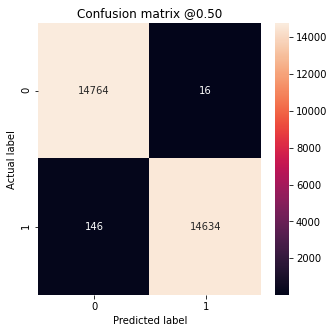

In [ ]:
train_predictions_baseline_smLGB = model_lgb.predict(X_train_sm)
test_predictions_baseline_smLGB = model_lgb.predict(X_test_sm)

plot_cm(y_test_sm, test_predictions_baseline_smLGB)
print("Classification Report: \n", classification_report(y_test_sm, np.round(test_predictions_baseline_smLGB)))

In [ ]:
feature_importances = pd.DataFrame({'feature': list(X_smote.columns), 'importance': feature_importances}).sort_values('importance', ascending = False)

In [ ]:
feature_importances

,feature,importance
19,Var_33,766.0
0,Var_3,719.0
1,Var_4,469.0
5,Var_11,416.0
3,Var_6,386.0
9,Var_18,335.0
2,Var_5,283.0
11,Var_20,269.0
15,Var_27,237.0
14,Var_26,179.0


In [ ]:
zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])
print('There are %d features with 0.0 importance' % len(zero_features))
print(zero_features)

There are 6 features with 0.0 importance
['Var_31_6', 'Var_31_4', 'Var_24', 'Var_37', 'Var_16', 'Var_35_Y']
